In [1]:
using DataFrames
using CSV
using GLM
using Plots
using StatsPlots

# Load the dataset
clouds = CSV.read("/Users/VSR/Desktop/Capstone/MLR/clouds.csv", DataFrame)

Row,seeding,time,sne,cloudcover,prewetness,echomotion,rainfall
,String3,Int64,Float64,Float64,Float64,String15,Float64
1,no,0,1.75,13.4,0.274,stationary,12.85
2,yes,1,2.7,37.9,1.267,moving,5.52
3,yes,3,4.1,3.9,0.198,stationary,6.29
4,no,4,2.35,5.3,0.526,moving,6.11
5,yes,6,4.25,7.1,0.25,moving,2.45
6,no,9,1.6,6.9,0.018,stationary,3.61
7,no,18,1.3,4.6,0.307,moving,0.47
8,no,25,3.35,4.9,0.194,moving,4.56
9,no,27,2.85,12.1,0.751,moving,6.35


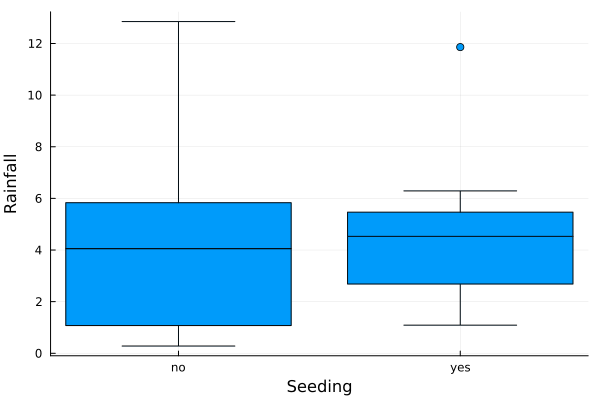

In [2]:
# Boxplot for rainfall based on seeding
@df clouds boxplot(:seeding, :rainfall, xlabel="Seeding", ylabel="Rainfall", legend=false)


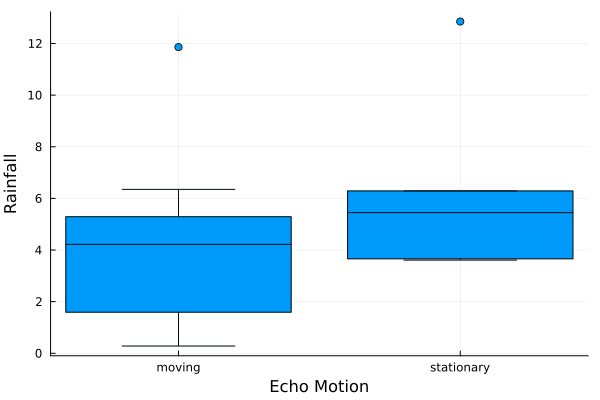

In [3]:
# Boxplot for rainfall based on echomotion
@df clouds boxplot(:echomotion, :rainfall, xlabel="Echo Motion", ylabel="Rainfall", legend=false)

In [4]:
formula = @formula(rainfall ~ seeding * (sne + cloudcover + prewetness + echomotion) + time)

FormulaTerm
Response:
  rainfall(unknown)
Predictors:
  seeding(unknown)
  sne(unknown)
  cloudcover(unknown)
  prewetness(unknown)
  echomotion(unknown)
  time(unknown)
  seeding(unknown) & sne(unknown)
  seeding(unknown) & cloudcover(unknown)
  seeding(unknown) & prewetness(unknown)
  seeding(unknown) & echomotion(unknown)

In [5]:
# Fit the linear model
clouds_lm = lm(formula, clouds)



StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

rainfall ~ 1 + seeding + sne + cloudcover + prewetness + echomotion + time + seeding & sne + seeding & cloudcover + seeding & prewetness + seeding & echomotion

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────────────────
                                            Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                            -0.346241    2.78773    -0.12    0.9031   -6.36877     5.67629
seeding: yes                           15.6829      4.44627     3.53    0.0037    6.07736    25.2885
sne                                     0.419814    0.84453     0.50    0.6274   -1.40468     2.24431
cloudcover  

In [6]:
# Display summary
println(coeftable(clouds_lm))

────────────────────────────────────────────────────────────────────────────────────────────────────────
                                            Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                            -0.346241    2.78773    -0.12    0.9031   -6.36877     5.67629
seeding: yes                           15.6829      4.44627     3.53    0.0037    6.07736    25.2885
sne                                     0.419814    0.84453     0.50    0.6274   -1.40468     2.24431
cloudcover                              0.387862    0.217855    1.78    0.0984   -0.0827851   0.858509
prewetness                              4.10834     3.60101     1.14    0.2745   -3.67116    11.8878
echomotion: stationary                  3.15281     1.93253     1.63    0.1268   -1.02215     7.32778
time                                   -0.0449743   0.0250529  -1.80    0.

In [7]:
# Coefficients of the model
betastar = coef(clouds_lm)
println("Coefficients: ", betastar)

Coefficients: [-0.3462409343145764, 15.682934805621263, 0.41981392522802835, 0.3878620740555284, 4.108341883199254, 3.1528135807304443, -0.04497427272335895, -3.19719005510762, -0.48625491906039703, -2.557066958137638, -0.5622184537996899]


In [8]:
# Covariance matrix
Vbetastar = vcov(clouds_lm)
println("Covariance Matrix: ", Vbetastar)

Covariance Matrix: [7.771461004103385 -7.8326742851430575 -1.6449585847503982 -0.14339673548558546 -2.5515598211153474 -2.5017430477123894 0.001210706668089541 1.64650279267758 0.1446054954284286 2.5555768236749485 2.512665200176435; -7.8326742851430575 19.769281908404878 2.2468948343133204 0.10504435067078476 1.4818983512543262 2.376291158285861 -0.03294446497702313 -5.13020220655483 -0.2641321293766778 -0.23800138105078394 -1.8634237570182495; -1.6449585847503982 2.2468948343133204 0.7132308147957999 -0.01468474429054792 -0.319962128794759 0.4744666422335838 -0.011905394037589778 -0.728415668677847 0.0027984932309891917 0.28046123267957634 -0.5818688167242589; -0.14339673548558546 0.10504435067078476 -0.01468474429054792 0.04746080402418751 -0.3594480676027438 -0.1636979777674927 0.0007585525108897242 0.01565224767626925 -0.046703471208673346 0.3619648682929158 0.17054111029025415; -2.5515598211153474 1.4818983512543262 -0.319962128794759 -0.3594480676027438 12.967251016260908 3.4778

In [9]:
using LinearAlgebra

In [10]:
std_errors = sqrt.(diag(Vbetastar))

11-element Vector{Float64}:
 2.7877340267865196
 4.4462660636094276
 0.8445299371815068
 0.21785500688344878
 3.6010069447671036
 1.9325259207276382
 0.02505286469353333
 1.2670720444552934
 0.24106011894573479
 4.480895842755781
 2.6442997451816206

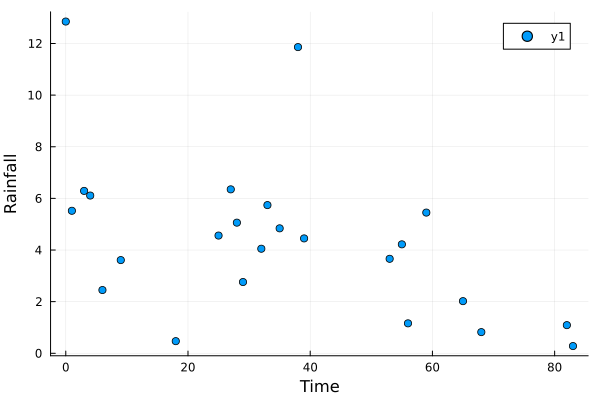

In [11]:
# Scatterplots for rainfall against each covariate

scatter(clouds.time, clouds.rainfall, xlabel="Time", ylabel="Rainfall")


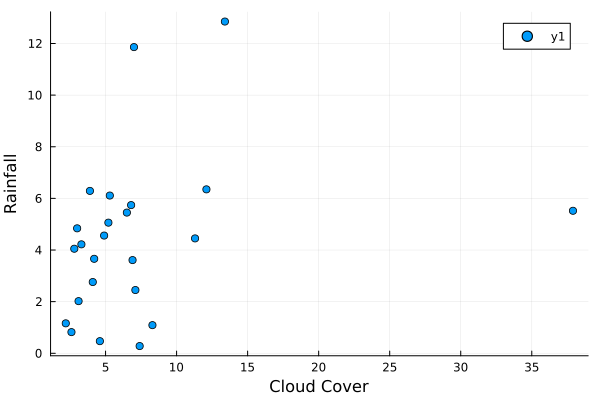

In [12]:
scatter(clouds.cloudcover, clouds.rainfall, xlabel="Cloud Cover", ylabel="Rainfall")


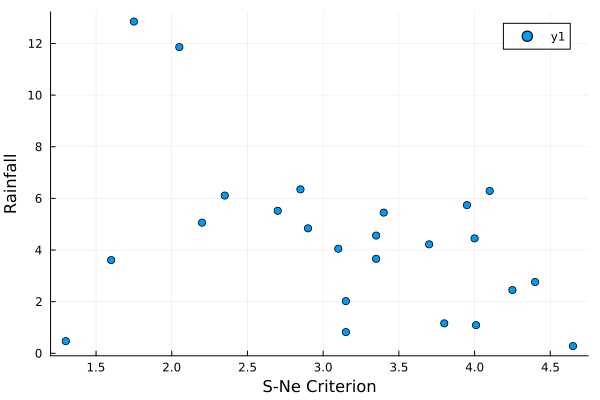

In [13]:
scatter(clouds.sne, clouds.rainfall, xlabel="S-Ne Criterion", ylabel="Rainfall")

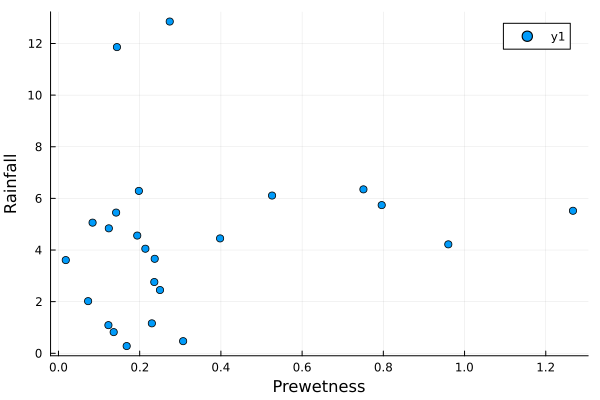

In [14]:
scatter(clouds.prewetness, clouds.rainfall, xlabel="Prewetness", ylabel="Rainfall")

In [15]:
# Residuals and fitted values
clouds_resid = residuals(clouds_lm)

24-element Vector{Float64}:
  2.9857155160944053
 -0.5091805522769732
 -0.03854438720425346
  1.4329184778650381
 -0.5022292147091072
 -2.2137049371512156
 -1.965406758259001
  1.9266786146719097
 -1.0644192394091476
 -2.525851048997393
  0.985324791346347
 -1.294124009482017
  0.004424686930510013
 -0.7653831050313453
  4.391315884259322
 -1.1469796367273117
 -0.7720105789431813
  0.4686552694894588
  0.6312920948981786
  0.03854438720424547
 -1.4528565851820452
  1.3349017263752234
  1.2043285705837379
 -1.1534099663453474

In [16]:
clouds_fitted = fitted(clouds_lm)


24-element Vector{Float64}:
  9.864284483905594
  6.029180552276973
  6.3285443872042535
  4.677081522134962
  2.9522292147091074
  5.8237049371512155
  2.435406758259001
  2.63332138532809
  7.414419239409147
  7.585851048997393
  1.7746752086536528
  5.344124009482017
  5.73557531306949
  5.605383105031345
  7.468684115740677
  5.596979636727312
  4.432010578943181
  3.751344730510541
  0.5287079051018213
  5.411455612795755
  3.472856585182045
 -0.5149017263752236
 -0.1143285705837378
  1.4334099663453475

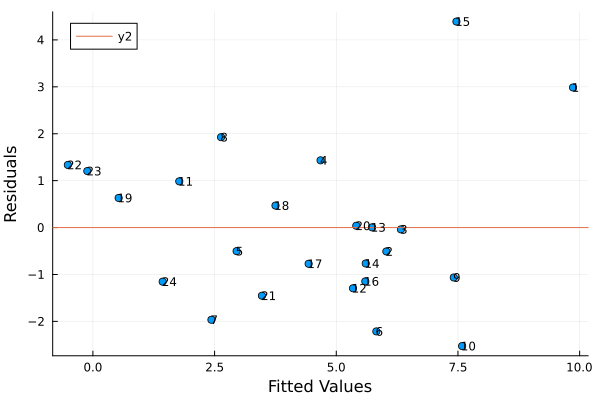

In [17]:
using Plots

# Set the backend to GR (which supports annotations)
gr()

# Plot residuals vs. fitted values
scatter(clouds_fitted, clouds_resid, xlabel="Fitted Values", ylabel="Residuals", label=false)

# Add a horizontal line at 0
hline!([0], linestyle=:solid)

# Add text labels (you can use row numbers or any other labels you'd like)
for i in 1:length(clouds_fitted)
    annotate!(clouds_fitted[i], clouds_resid[i], text(string(i), 8, :left))  # Display the index of each point
end

# Ensure the plot is displayed
display(current())

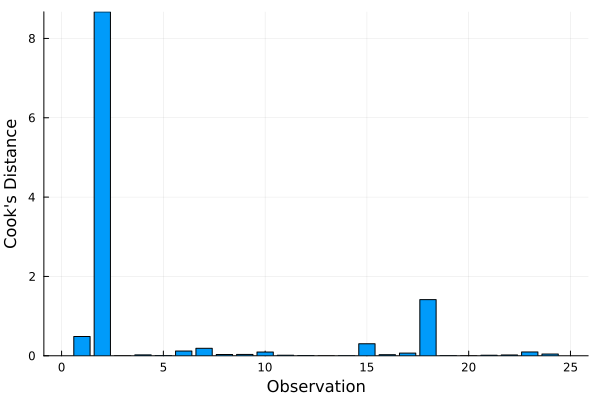

In [18]:
using LinearAlgebra, GLM, Plots

# Extract residuals from the model
model_residuals = residuals(clouds_lm)

# Number of observations and parameters
n = nrow(clouds)
p = length(coef(clouds_lm))

# Mean squared error (MSE)
mse = sum(model_residuals.^2) / (n - p)

# Hat matrix diagonal (leverage values)
X = modelmatrix(clouds_lm)  # Extract the model matrix
H = X * inv(X' * X) * X'    # Compute the hat matrix
h_ii = diag(H)              # Extract the diagonal elements (leverage)

# Compute Cook's distance
cooks_distances = (model_residuals.^2 / (p * mse)) .* (h_ii ./ (1 .- h_ii).^2)

# Plot Cook's distance
bar(1:length(cooks_distances), cooks_distances, xlabel="Observation", ylabel="Cook's Distance", legend=false)

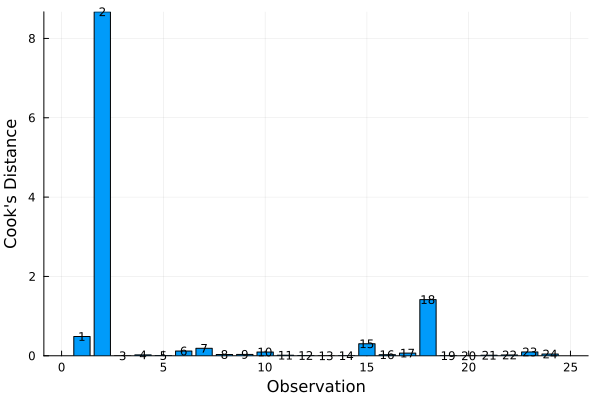

In [19]:
using LinearAlgebra, GLM, Plots

# Extract residuals from the model
model_residuals = residuals(clouds_lm)

# Number of observations and parameters
n = nrow(clouds)
p = length(coef(clouds_lm))

# Mean squared error (MSE)
mse = sum(model_residuals.^2) / (n - p)

# Hat matrix diagonal (leverage values)
X = modelmatrix(clouds_lm)  # Extract the model matrix
H = X * inv(X' * X) * X'    # Compute the hat matrix
h_ii = diag(H)              # Extract the diagonal elements (leverage)

# Compute Cook's distance
cooks_distances = (model_residuals.^2 / (p * mse)) .* (h_ii ./ (1 .- h_ii).^2)

# Create the bar plot
bar(1:length(cooks_distances), cooks_distances, xlabel="Observation", ylabel="Cook's Distance", legend=false)

# Add annotations on top of each bar
for i in 1:length(cooks_distances)
    annotate!(i, cooks_distances[i], text(string(i), 8, :center))
end

# Display the plot
display(current())

In [20]:
import Pkg
Pkg.add("Distributions")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


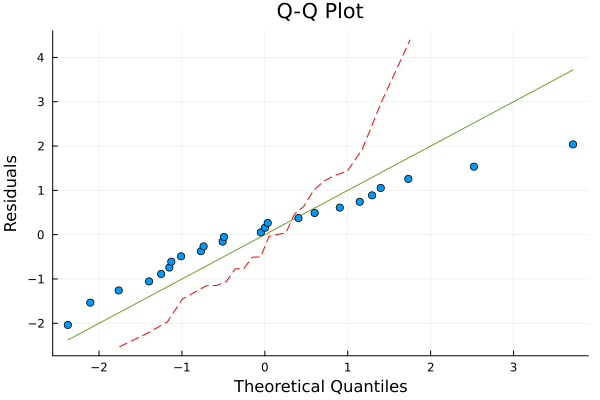

In [21]:
using StatsPlots, Distributions

# Q-Q Plot for residuals against a normal distribution
qqplot(model_residuals, Normal(), xlabel="Theoretical Quantiles", ylabel="Residuals", title="Q-Q Plot")

# Calculate the theoretical quantiles
sorted_residuals = sort(model_residuals)
n = length(model_residuals)
theoretical_quantiles = quantile(Normal(), (1:n) ./ (n+1))

# Add Q-Q line (1-to-1 line between theoretical and sample quantiles)
plot!(theoretical_quantiles, sorted_residuals, line=:dash, label="Q-Q Line", color=:red)

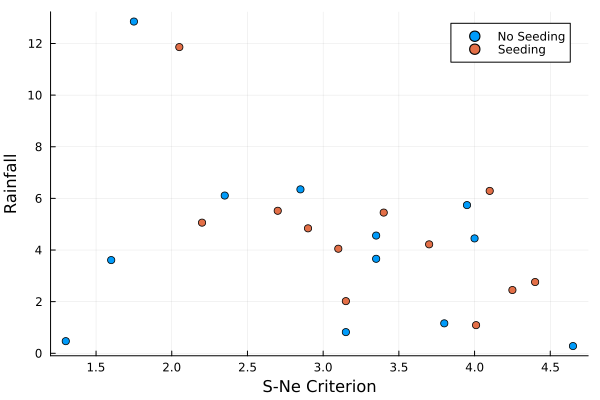

In [22]:


# Scatter plot of Rainfall vs. S-Ne criterion with regression lines
scatter(clouds.sne, clouds.rainfall, group=clouds.seeding, xlabel="S-Ne Criterion", ylabel="Rainfall", label=["No Seeding" "Seeding"])

